## task 6.6 using a sourced data set from Zillow
 
### 1 import libraries and e-commerce data set
### 1b solve for most profitable zipcode from e-commerce to use in Zillow time-series analysis
### 2a load Zillow data using api (unsuccessful with loading and sourcing alternate dataset that had zipcode and timeseries so data was downloaded as csv from https://data.nasdaq.com/databases/ZILLOW/usage/export
### 2b import csv files 
### 2c  combining data and wrangling
### 3 subsetting zillow data
### 4 plotting data, cleaning checks 
### 5 time-series decomposition
### 6 stationarity test
### 7 differencing and retest


In [1]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '2 data', 'prepared data', 'task_6.4.csv'), index_col = [0])

In [5]:
#change data type of order date, row id, postal code

df['Order Date'] = df['Order Date'].astype('datetime64') 
df['Row ID'] = df['Row ID'].astype('string')
df['Postal Code'] = df['Postal Code'].astype('string')

In [6]:
pd.set_option('display.max_columns', None)
df.describe()

,Sales,Quantity,Discount,Profit,unit_price,unit_profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340,52.172220,9.445520
std,585.257531,2.221776,0.207429,241.864342,137.397953,53.537438
min,0.444000,1.000000,0.000000,-3839.990400,0.067200,-479.998800
25%,17.018000,2.000000,0.000000,1.763200,4.410000,0.605600
50%,53.810000,3.000000,0.200000,8.296800,13.939600,2.538200
75%,205.105700,5.000000,0.200000,28.315125,52.152000,7.658880
max,13999.960000,14.000000,0.800000,6719.980800,3499.990000,1679.995200


<Axes: xlabel='Order Date', ylabel='Count'>

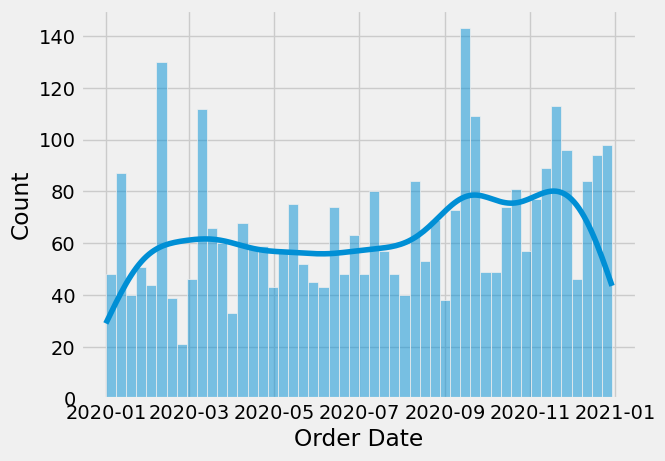

In [7]:
sns.histplot(df['Order Date'],bins = 50, kde = True) #seaborn histogram

In [58]:
#view head tail shpe
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat,unit_price,unit_profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,low profit,9.7792,1.71136
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall Clock",474.430,11,0.0,199.2606,high profit,43.1300,18.11460
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,low profit,1.8000,0.86400
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,profit loss,72.7296,-17.27328
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contemporary Contour Shape Chair Mats",141.420,5,0.6,-187.3815,profit loss,11.3136,-14.99052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,low profit,12.9900,0.38970
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,low profit,14.0736,5.27760
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,low profit,5.5616,1.80752
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,low profit,8.2880,2.59000


### 1b solve for most profitable postal code

In [9]:
profit_by_postal_code = df.groupby('Postal Code')['Profit'].sum()

# Get the 'Postal Code' with the largest sum of 'Profit'
postal_code_largest_profit = profit_by_postal_code.idxmax()

# Print the result
print("Postal Code with the largest sum of Profit:", postal_code_largest_profit)

Postal Code with the largest sum of Profit: 10035


In [10]:
profit_by_postal_code.nlargest(10, keep = 'all')

Postal Code
10035    8296.5605
10024    7964.9011
98115    7858.8836
19711    5573.3940
98105    4712.8968
49201    4207.5324
10009    3692.5714
90049    3216.6456
98103    2946.9166
94110    2830.7760
Name: Profit, dtype: float64

In [11]:
# Filter the DataFrame based on 'postal_code_largest_profit'
filtered_df = df[df['Postal Code'] == postal_code_largest_profit]

# Extract the 'City' and 'State' for the largest profit postal code
city_largest_profit = filtered_df['City'].iloc[0]
state_largest_profit = filtered_df['State'].iloc[0]

# Print the result
print("Most profitable city postal code:", city_largest_profit)
print("Most profitable state postal code:", state_largest_profit)

Most profitable city postal code: New York City
Most profitable state postal code: New York


### 2a get data from zillow via nasdaqdatalink using api (failed to load the zillow dataset)

In [12]:
#configure api key
#nasdaqdatalink.ApiConfig.apikey = xxxxxx

In [13]:
#get fed res natural rate of unemployment 
#data = nasdaqdatalink.get_table('ZILLOW/DATA')

### 2b importing 3 datasets as csv files because unable to access via api key
   

In [14]:
#import the values with date data set
zd = pd.read_csv(os.path.join(path, '2 data', 'zillow data', 'ZILLOW_DATA', 'ZILLOW_DATA.csv'))

In [15]:
#check
zd

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.000000
1,ZATT,3101,1998-02-28,342993.000000
2,ZATT,3101,1998-03-31,346763.000000
3,ZATT,3101,1998-04-30,349356.000000
4,ZATT,3101,1998-05-31,351981.000000
...,...,...,...,...
139559066,Z4BR,786428,2023-04-30,469278.265889
139559067,Z4BR,827535,2023-06-30,482086.819071
139559068,Z4BR,827535,2023-05-31,482270.937317
139559069,Z4BR,827535,2023-04-30,481230.558224


In [16]:
#import the indicators data set
zi = pd.read_csv(os.path.join(path, '2 data', 'zillow data', 'ZILLOW_INDICATORS', 'ZILLOW_INDICATORS.csv'))

In [17]:
#check
zi

,indicator_id,indicator,category
0,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
2,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
3,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z1BR,ZHVI 1-Bedroom Time Series ($),Home values
9,LSAW,"Median List Price (Smooth, All Homes, Weekly V...",Inventory and sales


In [18]:
#import the regions data set
zr = pd.read_csv(os.path.join(path, '2 data', 'zillow data', 'ZILLOW_REGIONS','ZILLOW_REGIONS.csv'))

In [19]:
#check
zr

,region_id,region_type,region
0,54296,city,"San Diego; CA; San Diego-Chula Vista-Carlsbad,..."
1,394463,metro,"Chicago, IL"
2,394514,metro,"Dallas-Fort Worth, TX"
3,394692,metro,"Houston, TX"
4,19533,city,"Naples; FL; Naples-Marco Island, FL; Collier C..."
...,...,...,...
89300,84028,zip,59402; MT; Great Falls; Cascade County
89301,98496,zip,95944; CA; Sierra County; Downieville
89302,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...
89303,80541,zip,50831; IA; Union County; Arispe


### 2c combining data and wrangling for time series analysis

In [20]:
#create subset of all homes time series from zd
zd_sub = zd[zd['indicator_id'] == 'ZALL']

In [21]:
#check
zd_sub

,indicator_id,region_id,date,value
4957,ZALL,9,2020-06-30,578387.000000
5250,ZALL,54,2020-06-30,213805.000000
5252,ZALL,43,2020-06-30,332164.000000
5545,ZALL,14,2020-06-30,255416.000000
5838,ZALL,21,2020-06-30,207647.000000
...,...,...,...,...
139430275,ZALL,267809,2023-04-30,799606.627717
139430276,ZALL,251134,2023-06-30,506782.772866
139430277,ZALL,251134,2023-05-31,504102.366049
139430278,ZALL,251134,2023-04-30,501495.978236


In [22]:
#combine subset with region dataset 
df2 = zr.merge(zd_sub, on = ['region_id'], indicator = True)

In [23]:
#check
df2

,region_id,region_type,region,indicator_id,date,value,_merge
0,54296,city,"San Diego; CA; San Diego-Chula Vista-Carlsbad,...",ZALL,2020-06-30,687189.000000,both
1,54296,city,"San Diego; CA; San Diego-Chula Vista-Carlsbad,...",ZALL,2020-10-31,706520.000000,both
2,54296,city,"San Diego; CA; San Diego-Chula Vista-Carlsbad,...",ZALL,2020-12-31,733416.000000,both
3,54296,city,"San Diego; CA; San Diego-Chula Vista-Carlsbad,...",ZALL,2020-08-31,673456.000000,both
4,54296,city,"San Diego; CA; San Diego-Chula Vista-Carlsbad,...",ZALL,2023-06-30,937452.776699,both
...,...,...,...,...,...,...,...
20219909,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2019-12-31,88169.000000,both
20219910,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2020-01-31,88868.000000,both
20219911,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2020-02-29,90279.000000,both
20219912,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2020-03-31,91351.000000,both


In [24]:
#check merge
df2['_merge'].value_counts()

both          20219914
left_only            0
right_only           0
Name: _merge, dtype: int64

In [25]:
#check the dataframe for unique region values
df2['region_type'].value_counts()

zip       7892881
city      6575615
neigh     4783005
county     702466
metro      249340
state       16607
Name: region_type, dtype: int64

In [26]:
 #remove all rows that do not include a zip
df3 = df2[df2['region_type'] == 'zip']

In [27]:
#check
df3

,region_id,region_type,region,indicator_id,date,value,_merge
4950,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-...",ZALL,2021-04-30,405854.0,both
4951,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-...",ZALL,2021-03-31,397411.0,both
4952,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-...",ZALL,2020-06-30,338733.0,both
4953,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-...",ZALL,2021-07-31,448015.0,both
4954,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-...",ZALL,2021-06-30,434161.0,both
...,...,...,...,...,...,...,...
20219909,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2019-12-31,88169.0,both
20219910,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2020-01-31,88868.0,both
20219911,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2020-02-29,90279.0,both
20219912,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; S...,ZALL,2020-03-31,91351.0,both


In [28]:
#view region column for separating the zipcode 
#code for altering column-view setting: pd.set_option('display.max_columns', 5)
pd.set_option('display.max_colwidth', None) #alter column width for viewing
df3['region'].head()

4950    08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood
4951    08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood
4952    08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood
4953    08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood
4954    08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood
Name: region, dtype: object

In [29]:
#create new column 'zipcode' with the extracted zipcodes
df3['zipcode'] = df3['region'].str[:5]

In [48]:
#check
df3

,region_id,region_type,region,indicator_id,date,value,_merge,zipcode
4950,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood",ZALL,2021-04-30,405854.0,both,08701
4951,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood",ZALL,2021-03-31,397411.0,both,08701
4952,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood",ZALL,2020-06-30,338733.0,both,08701
4953,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood",ZALL,2021-07-31,448015.0,both,08701
4954,61148,zip,"08701; NJ; New York-Newark-Jersey City, NY-NJ-PA; Ocean County; Lakewood",ZALL,2021-06-30,434161.0,both,08701
...,...,...,...,...,...,...,...,...
20219909,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; San Bernardino County; Essex,ZALL,2019-12-31,88169.0,both,92332
20219910,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; San Bernardino County; Essex,ZALL,2020-01-31,88868.0,both,92332
20219911,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; San Bernardino County; Essex,ZALL,2020-02-29,90279.0,both,92332
20219912,96813,zip,92332; CA; Riverside-San Bernardino-Ontario; San Bernardino County; Essex,ZALL,2020-03-31,91351.0,both,92332


In [49]:
#check zipcode unique values, there are 41704 zipcodes in US
df3['zipcode'].nunique()

31531

### 3 subsetting for the zipcode identified as being most profitable in step 1

In [79]:
df4 = df3.loc[df3['zipcode'] == '10035']

In [80]:
#check
df4

,region_id,region_type,region,indicator_id,date,value,_merge,zipcode
706341,61649,zip,10035,ZALL,2021-04-30,611883.000000,both,10035
706342,61649,zip,10035,ZALL,2021-03-31,615589.000000,both,10035
706343,61649,zip,10035,ZALL,2020-06-30,650274.000000,both,10035
706344,61649,zip,10035,ZALL,2021-07-31,637511.000000,both,10035
706345,61649,zip,10035,ZALL,2021-06-30,635320.000000,both,10035
...,...,...,...,...,...,...,...,...
706575,61649,zip,10035,ZALL,2022-06-30,777352.000000,both,10035
706576,61649,zip,10035,ZALL,2022-01-31,705822.000000,both,10035
706577,61649,zip,10035,ZALL,2022-12-31,691263.528666,both,10035
706578,61649,zip,10035,ZALL,2022-09-30,767278.000000,both,10035


In [81]:
#remove extra columns
df4 = df4.drop(columns ={'region_id','region_type', 'region', 'indicator_id', '_merge', 'zipcode'})

In [82]:
#check datatypes
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 706341 to 706579
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    239 non-null    object 
 1   value   239 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [83]:
df4.sort_values(by='date')

,date,value
706367,2003-08-31,270981.000000
706368,2003-09-30,272012.000000
706369,2003-10-31,273388.000000
706370,2003-11-30,275499.000000
706371,2003-12-31,276282.000000
...,...,...
706574,2023-02-28,674058.507247
706579,2023-03-31,676306.201361
706353,2023-04-30,580306.452612
706352,2023-05-31,584992.587497


#### set date as index

In [84]:
df4['datetime'] = pd.to_datetime(df4['date']) # Create a datetime column from 'date'

In [87]:
df4 = df4.set_index('datetime') # Set the datetime as the index of the dataframe.


In [91]:
df4.drop(['date'], axis=1, inplace=True) # Drop the column.


In [92]:
df4 = df4.sort_values(by='datetime')

In [95]:
pd.set_option('display.max_rows', 250)

In [96]:
#check 
df4.head(250)

,value
datetime,
2003-08-31,270981.000000
2003-09-30,272012.000000
2003-10-31,273388.000000
2003-11-30,275499.000000
2003-12-31,276282.000000
2004-01-31,274303.000000
2004-02-29,272375.000000
2004-03-31,273752.000000
2004-04-30,278794.000000


### 4 plotting combined & subsetted Zillow data in line charts, checks for nan and duplicates

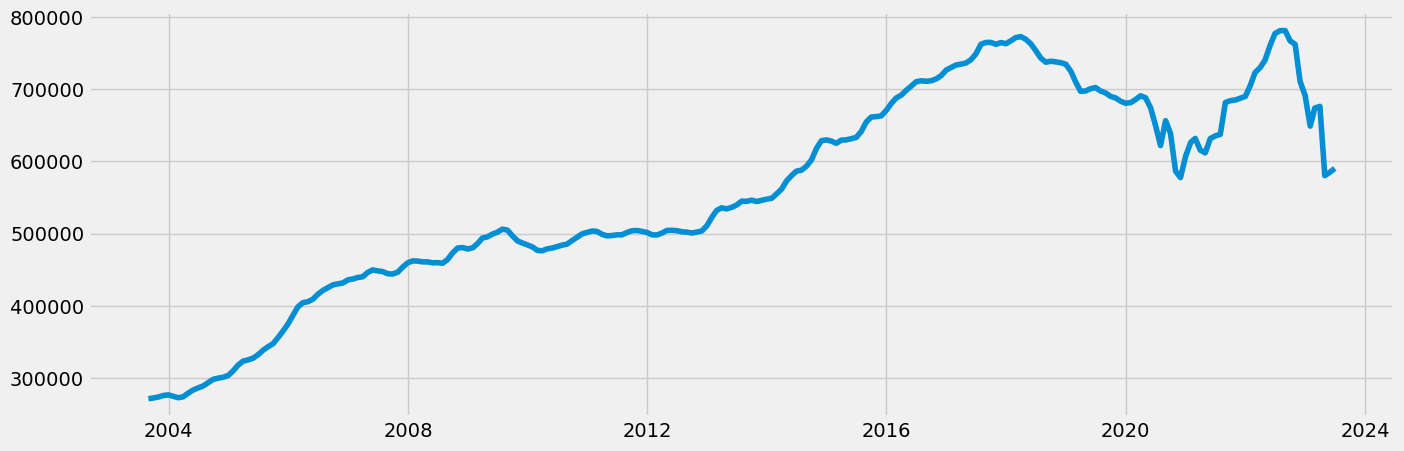

In [97]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df4)

<Figure size 1500x500 with 0 Axes>

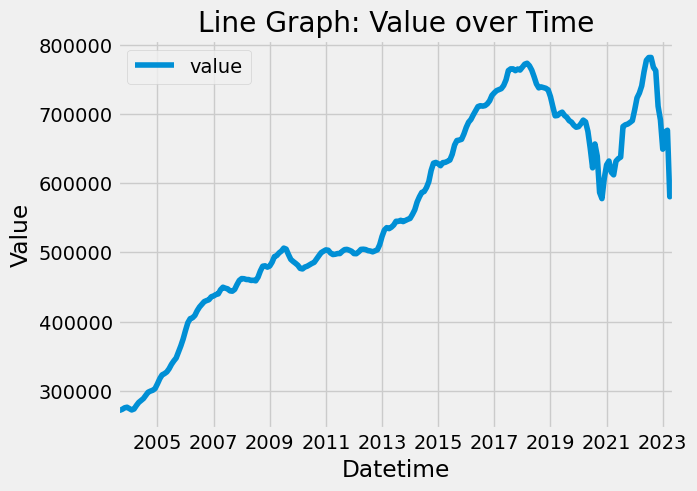

In [98]:
plt.figure(figsize=(15,5), dpi=100) 
df4.plot(y='value')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Line Graph: Value over Time')
plt.grid(True)
plt.show()

In [99]:
#check for missing values
df4.isnull().sum()

value    0
dtype: int64

In [100]:
#check for dups
dups = df4.duplicated()
dups.sum()

0

### 5 time-series decomposition

In [101]:
data_sub = df4

In [102]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [103]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

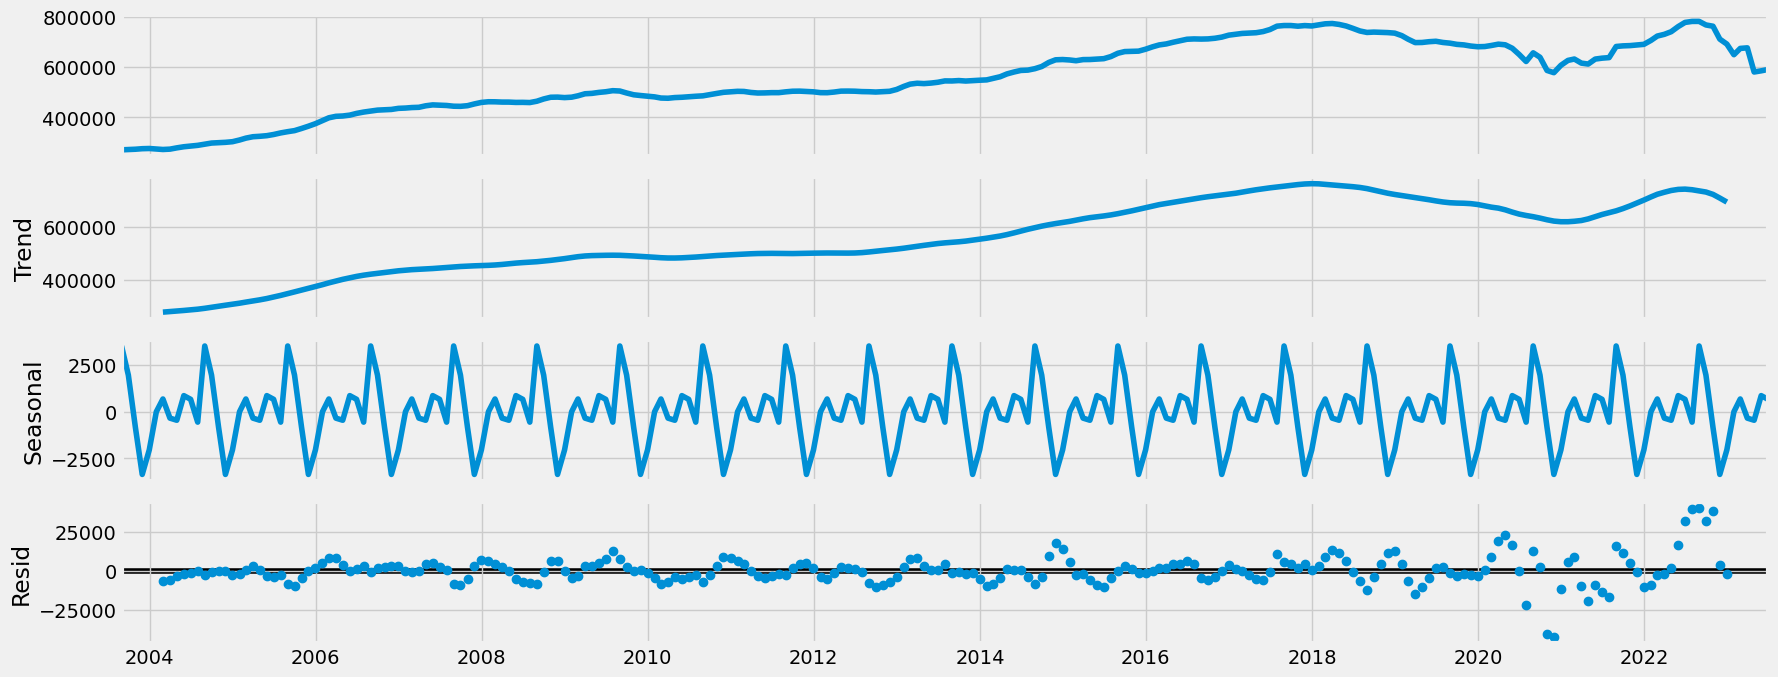

In [104]:
# Plot the separate components

decomposition.plot()
plt.show()

#### insight
    * the trend was observed in line chart and expected
    * values after 2020 have more noise than the values prior, this is the covid real estate timewarp
    * it appears some smoothing could be done to have the first chart represent the second chart more closely but I will proceed as is

### 6 testing Zillow data for stationarity and autocorrelation
#### null hypothesis: there is a unit root

In [106]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.095595
p-value                          0.246290
Number of Lags Used             13.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


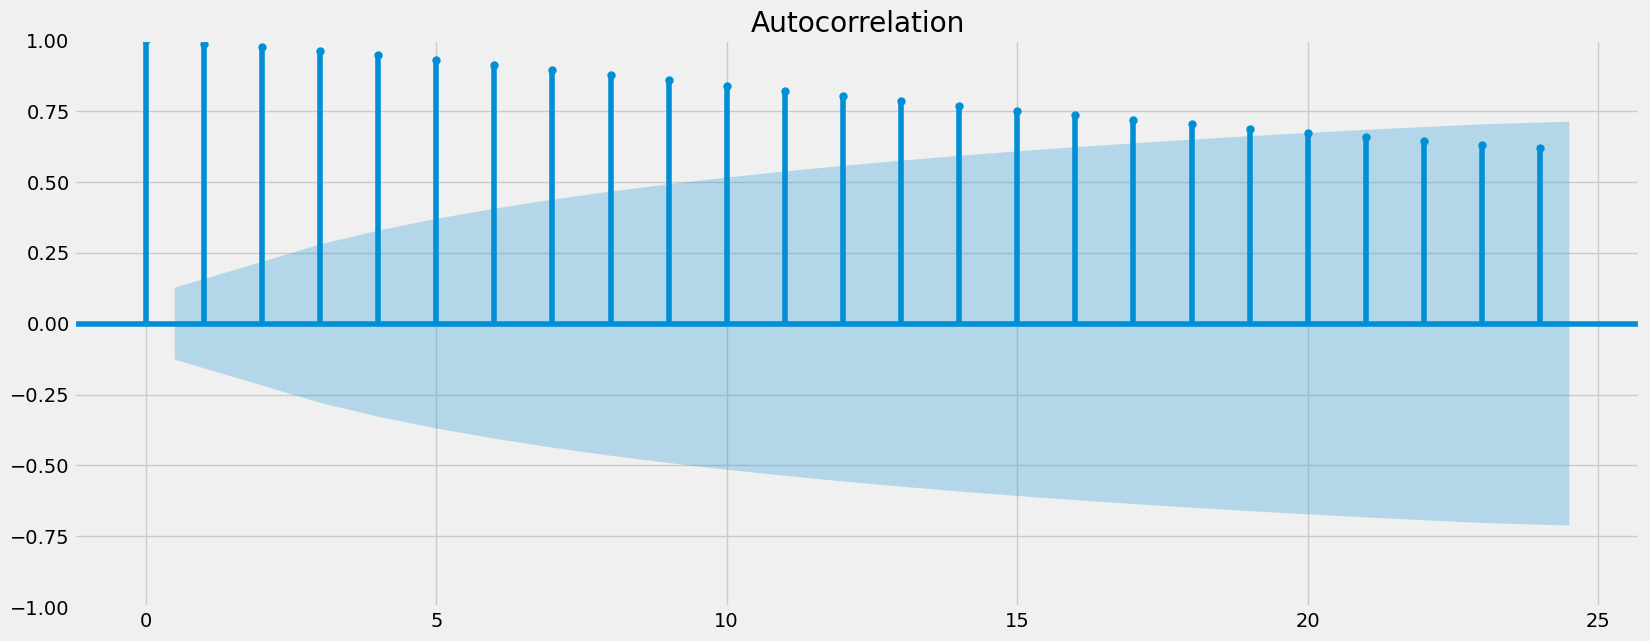

In [107]:
# plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

#### cannot rule out null hypothesis, will conduct differencing and retest 

### 7 differencing the time series data from Zillow 


In [108]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [109]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [110]:
data_diff.head()

,value
datetime,
2003-09-30,1031.0
2003-10-31,1376.0
2003-11-30,2111.0
2003-12-31,783.0
2004-01-31,-1979.0


In [111]:
data_diff.columns

Index(['value'], dtype='object')

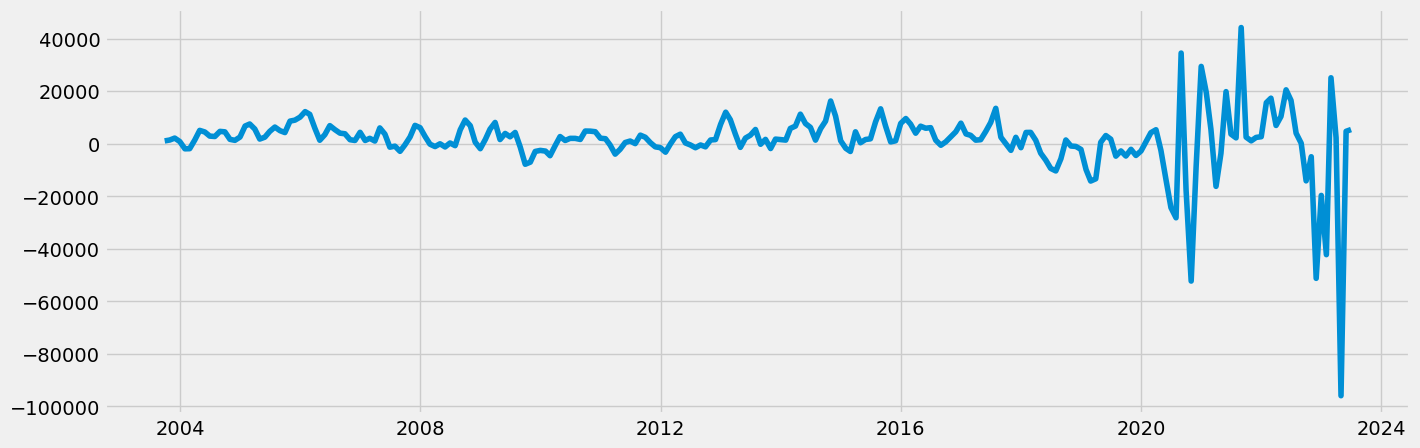

In [112]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### 8 dickey-fuller & autocorrellation retest post differencing

In [113]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.092916
p-value                          0.027082
Number of Lags Used             15.000000
Number of Observations Used    222.000000
Critical Value (1%)             -3.460154
Critical Value (5%)             -2.874649
Critical Value (10%)            -2.573757
dtype: float64


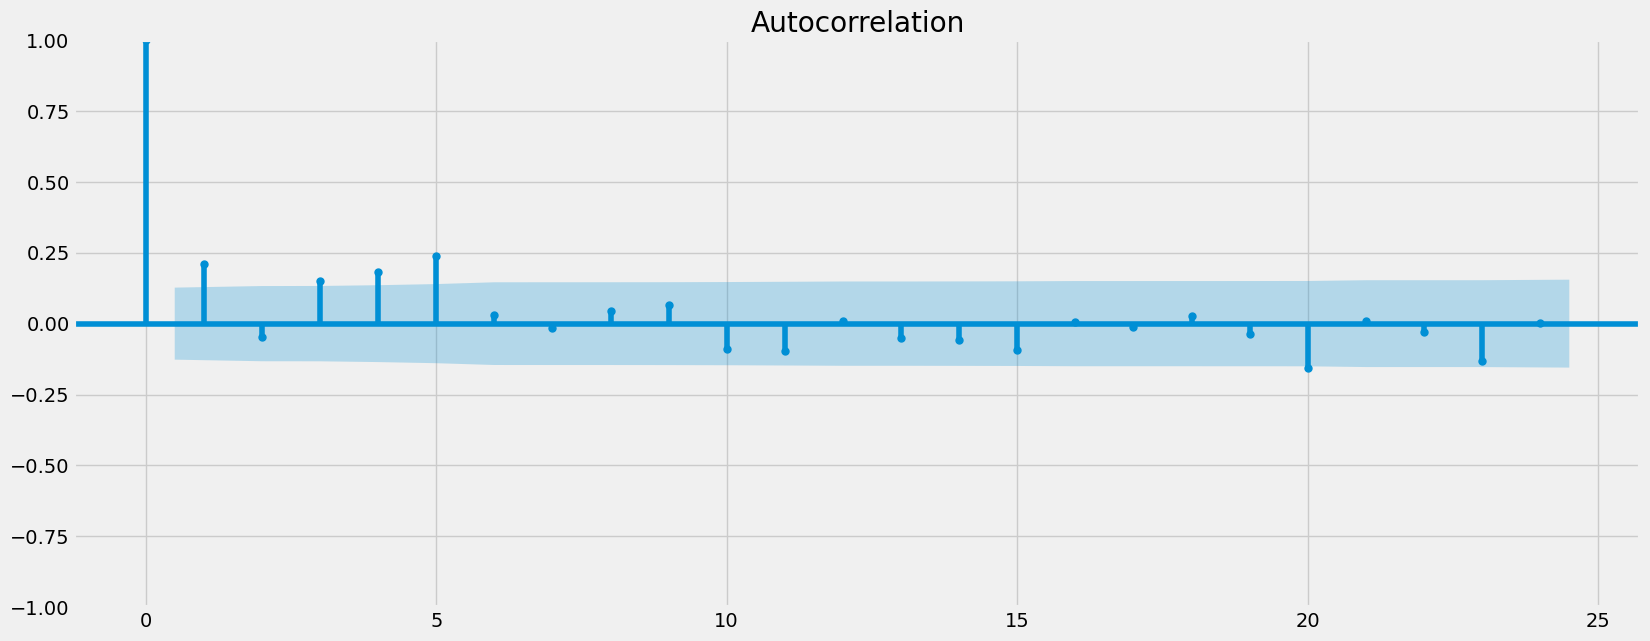

In [114]:
plot_acf(data_diff)
plt.show()

#### the test statistic has a lower value than the critical value, therefore the null hypothesis can be rejected at this time